In [1]:
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import MathsUtilities as MUte
import matplotlib.patheffects as path_effects
import GraphHelpers as GH
%matplotlib inline

In [2]:
csfont = {'fontname':'Comic Sans MS'}

In [3]:
RawData = pd.read_excel('.\\RawData\\BnJCE\\BrookingAndJamiesonRawData.xlsx',sheet_name='LeafData')
def MakeSimName(x):
    Name = 'PalmerstonNorthCETreat'
    Name += RawData.loc[x,'Temp']
    Name += RawData.loc[x,'Pp']
    Name += 'Cv'
    Name += RawData.loc[x,'Geno']
    Name += 'Durat'
    Name += str(int(RawData.loc[x,'DurationWeeks']))
    return Name
RawData.loc[:,'SimulationName'] = [MakeSimName(x) for x in RawData.index] 

In [4]:
RawData.set_index(['Geno','Temp','Pp','DurationWeeks','DAS'],inplace=True,drop=False)
Means = RawData.groupby(level=['Geno','Temp','Pp','DurationWeeks']).mean()
Genotypes = Means.index.get_level_values(0).drop_duplicates()
def MakeSimNameIndexedDF(x):
    Name = 'PalmerstonNorthCETreat'
    Name += x[1]
    Name += x[2]
    Name += 'Cv'
    Name += x[0]
    Name += 'Durat'
    Name += str(int(x[3]))
    return Name
Means.loc[:,'SimulationName'] = [MakeSimNameIndexedDF(x) for x in Means.index]
Means.loc[:,'Wheat.Phenology.CurrentStageName'] = 'HarvestRipe'

C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\3743463847.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Means = RawData.groupby(level=['Geno','Temp','Pp','DurationWeeks']).mean()


In [24]:
Means.loc[:,'PPTret'] = [x.replace('0h','Dark') for x in Means.index.get_level_values(2)]
Means.loc[:,'Trt'] = [x[1] +'_'+Means.loc[x,'PPTret'] for x in Means.index]
Means.loc[:,'Genotype'] = ['Batten'+x[0] for x in Means.index]
Means.loc[:,'Duration'] = Means.index.get_level_values(3)
Means.sort_values(['Genotype','TreatTemp'],inplace=True)
Summary = Means.loc[:,['SimulationName','Genotype','Trt','FLN','Duration']].reset_index()
Summary.drop(['Geno','Temp','Pp','DurationWeeks'],axis=1).to_csv('./ProcessedData/BnJFLN.csv',index=False)

C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\1399301513.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(Means.loc[(G,T[0],T[1]),'DurationDays'],
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\1399301513.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  Means.loc[(G,T[0],T[1]),'FLN'],'o-',
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\1399301513.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(Means.loc[(G,T[0],T[1]),'DurationDays'],
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\1399301513.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  Means.loc[(G,T[0],T[1]),'FLN'],marker=style[z],


Text(-12, 21.5, 'Vernalisation Response (16 h Pp)')

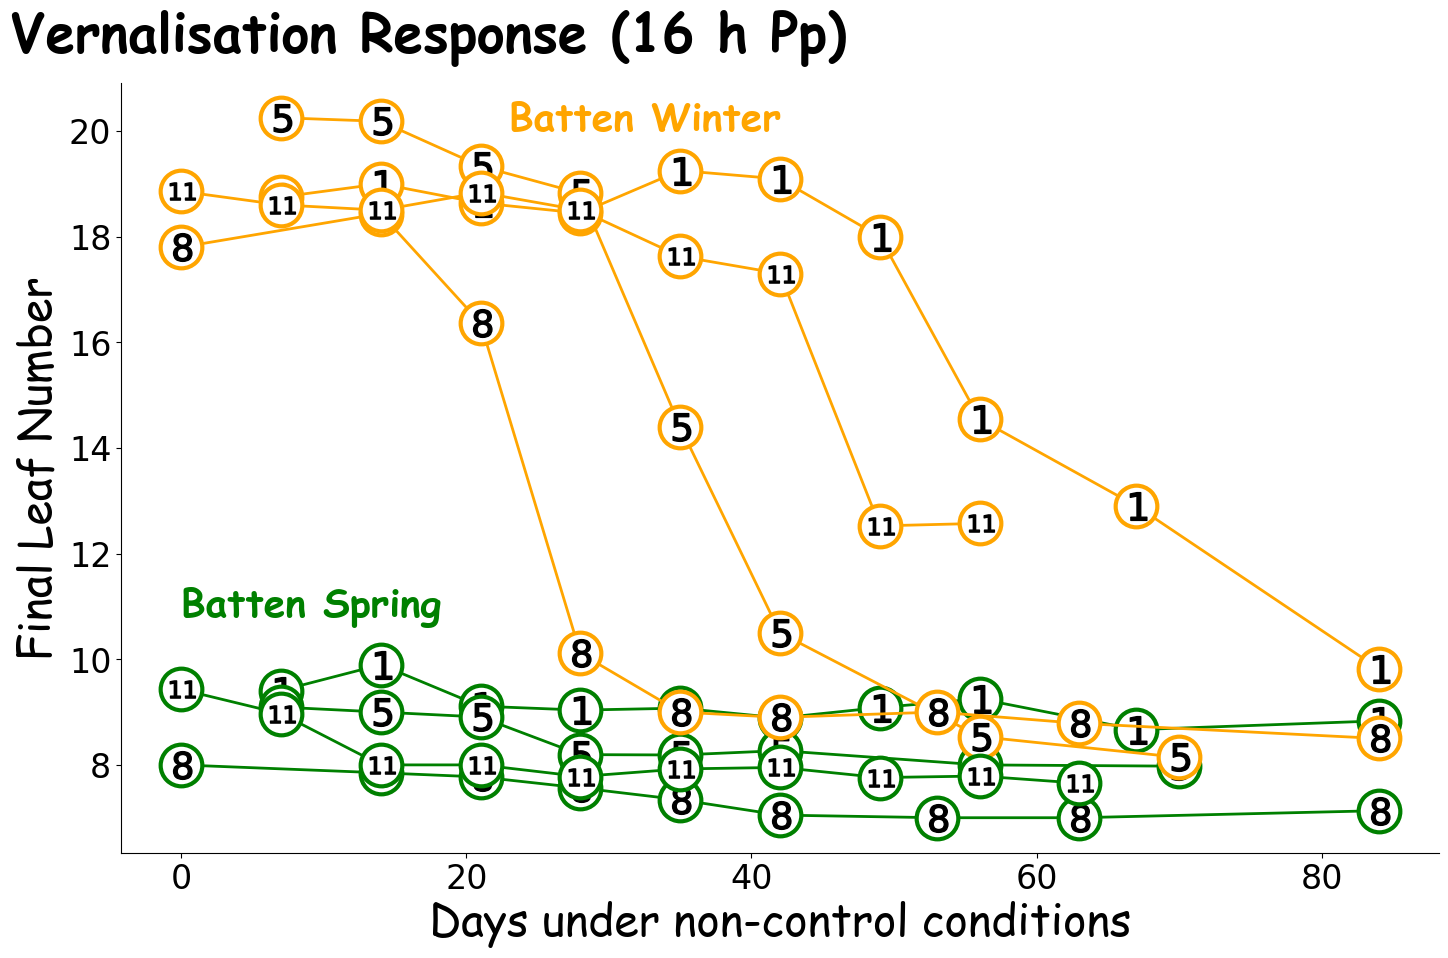

In [6]:
cols = ['g','orange']
alphas = [1,0.75,0.5,0.25]
sizes = [5,10,15,20]
style = [u'$1$', u'$5$', u'$8$', u'$11$']
Graph = plt.figure(figsize=(17,10))
ax = Graph.add_subplot(1,1,1)
z=0
for T in [('1oC','0h'),('5oC','16h'),('8oC','16h'),('11oC','16h')]:
    p = 0
    for G in Genotypes:
        plt.plot(Means.loc[(G,T[0],T[1]),'DurationDays'],
                 Means.loc[(G,T[0],T[1]),'FLN'],'o-',
                 color = cols[p],ms=30, mfc='w',mew=3, lw=2,
                 label = T[0] + ' '+ G)
        plt.plot(Means.loc[(G,T[0],T[1]),'DurationDays'],
                 Means.loc[(G,T[0],T[1]),'FLN'],marker=style[z],
                 ls='None', ms=20, color='k',
                 label = T[0] + ' '+ G)
        p += 1
    z += 1
plt.tick_params(labelsize=24)
plt.ylabel('Final Leaf Number',fontsize=32,**csfont)
plt.xlabel('Days under non-control conditions',fontsize=32,**csfont)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.text(0,10.8,'Batten Spring',fontsize=28,color=cols[0],fontweight='bold',**csfont)
plt.text(23,20,'Batten Winter',fontsize=28,color=cols[1],fontweight='bold',**csfont)
plt.text(-12,21.5,'Vernalisation Response (16 h Pp)',fontsize = 38,fontweight='bold',**csfont)

C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\1290151153.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(Means.loc[(G,T,P),'DurationDays'],
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\1290151153.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  Means.loc[(G,T,P),'FLN'],'o-',
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\1290151153.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(Means.loc[(G,T,P),'DurationDays'],
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\1290151153.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  Means.loc[(G,T,P),'FLN'],marker=style[z],


Text(60, 11, '8 h Pp')

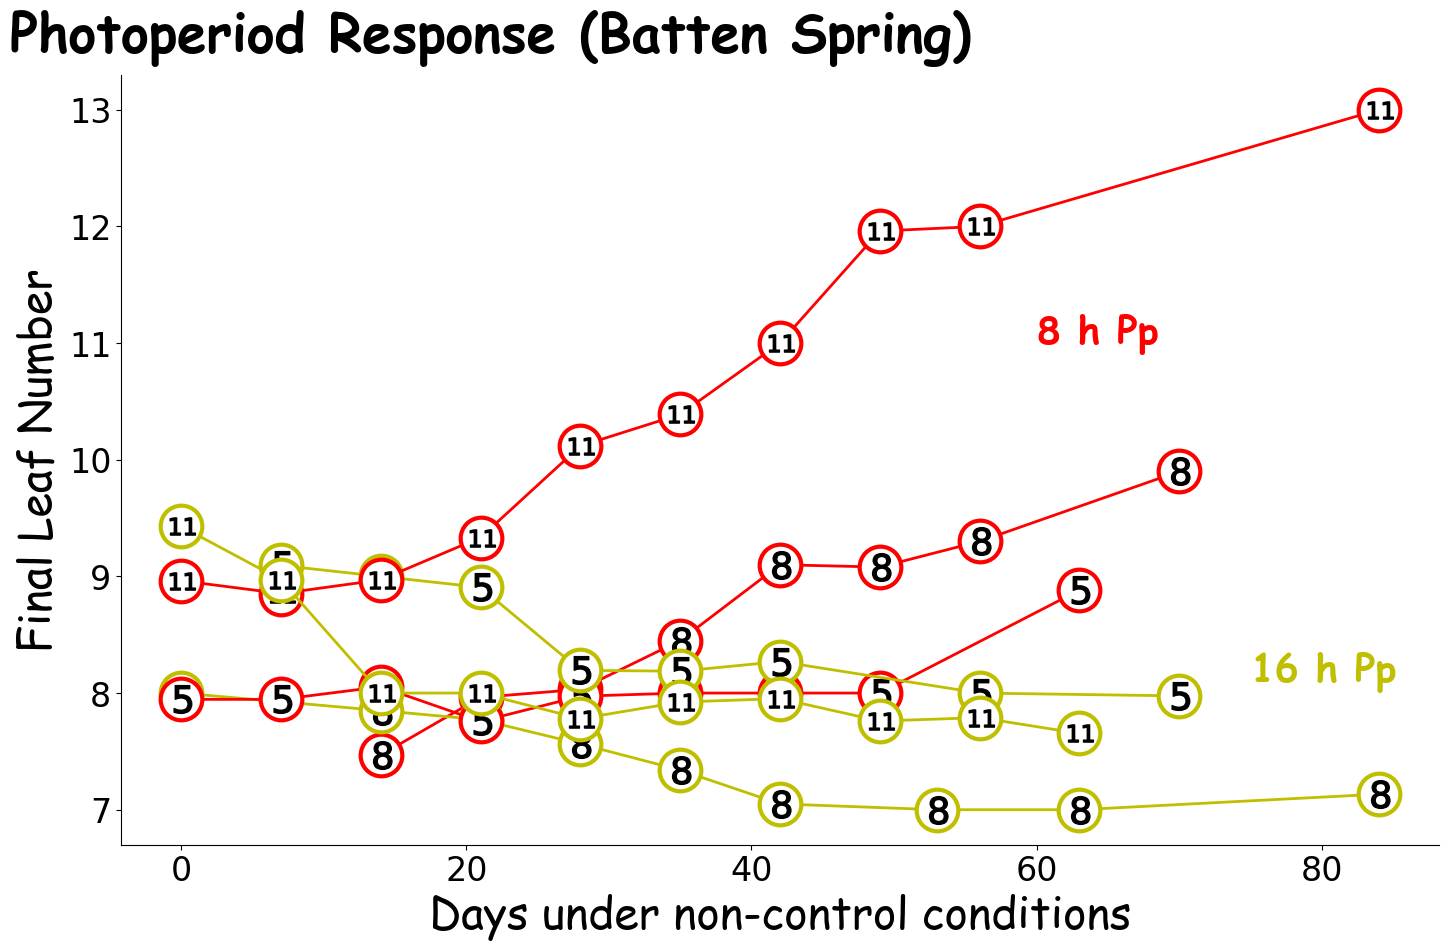

In [7]:
cols = ['r','y']
alphas = [1,0.75,0.5,0.25]
sizes = [5,10,15,20]
style = [u'$8$',u'$5$',  u'$11$']
Graph = plt.figure(figsize=(17,10))
ax = Graph.add_subplot(1,1,1)
z=0
G = 'Spring'
for T in ['8oC', '5oC', '11oC']:
    p = 0
    for P in ['8h','16h']:
        plt.plot(Means.loc[(G,T,P),'DurationDays'],
                 Means.loc[(G,T,P),'FLN'],'o-',
                 color = cols[p],ms=30, mfc='w',mew=3, lw=2,
                 label = T[0] + ' '+ G)
        plt.plot(Means.loc[(G,T,P),'DurationDays'],
                 Means.loc[(G,T,P),'FLN'],marker=style[z],
                 ls='None', ms=20, color='k',
                 label = T[0] + ' '+ G)
        p += 1
    z += 1
plt.tick_params(labelsize=24)
plt.ylabel('Final Leaf Number',fontsize=32,**csfont)
plt.xlabel('Days under non-control conditions',fontsize=32,**csfont)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.text(-12,13.5,'Photoperiod Response (Batten Spring)',fontsize = 38,fontweight='bold',**csfont)
plt.text(75,8.1,'16 h Pp',fontsize=28,color=cols[1],fontweight='bold',**csfont)
plt.text(60,11,'8 h Pp',fontsize=28,color=cols[0],fontweight='bold',**csfont)

C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\3052531606.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(Means.loc[(G,T,P),'DurationDays'],
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\3052531606.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  Means.loc[(G,T,P),'FLN'],'o-',
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\3052531606.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(Means.loc[(G,T,P),'DurationDays'],
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\3052531606.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  Means.loc[(G,T,P),'FLN'],marker=style[z],


Text(-12, 21.5, 'Vern x Pp Response (Batten Winter)')

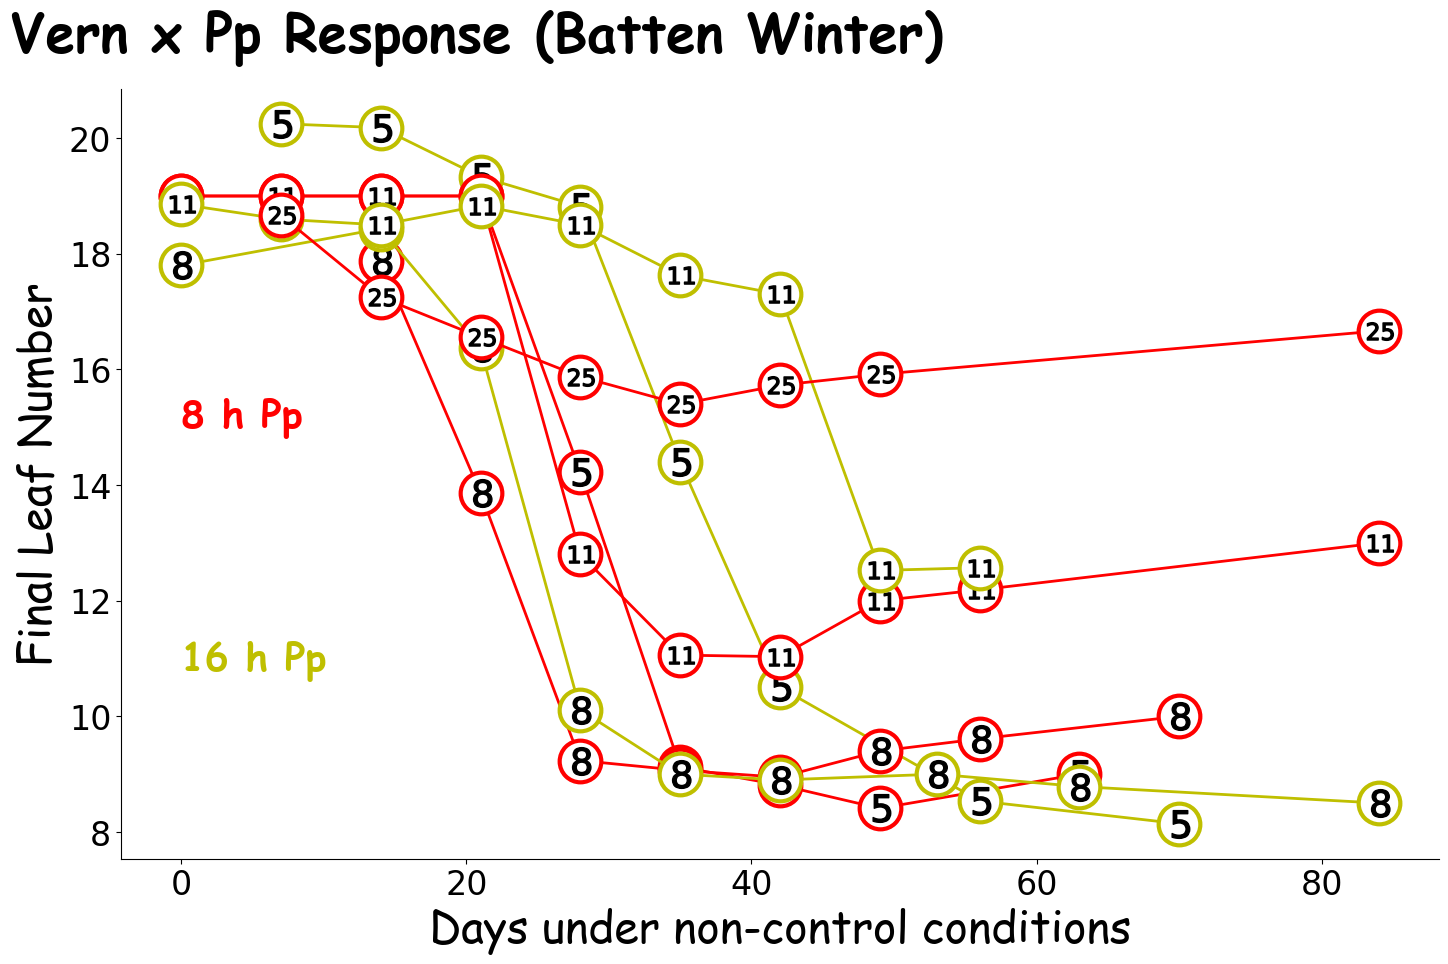

In [8]:
cols = ['r','y']
alphas = [1,0.75,0.5,0.25]
sizes = [5,10,15,20]
style = [u'$5$', u'$8$', u'$11$',u'$25$']
Graph = plt.figure(figsize=(17,10))
ax = Graph.add_subplot(1,1,1)
G = 'Winter'
z=0
for T in ['5oC','8oC','11oC','25oC']:
    p = 0
    for P in ['8h','16h']:
        try:
            plt.plot(Means.loc[(G,T,P),'DurationDays'],
                     Means.loc[(G,T,P),'FLN'],'o-',
                     color = cols[p],ms=30, mfc='w',mew=3, lw=2,
                     label = T[0] + ' '+ G)
            plt.plot(Means.loc[(G,T,P),'DurationDays'],
                     Means.loc[(G,T,P),'FLN'],marker=style[z],
                     ls='None', ms=20, color='k',
                     label = T[0] + ' '+ G)
        except:
            dummy = 'dumb'
        p += 1
    z += 1
plt.tick_params(labelsize=24)
plt.ylabel('Final Leaf Number',fontsize=32,**csfont)
plt.xlabel('Days under non-control conditions',fontsize=32,**csfont)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.text(0,10.8,'16 h Pp',fontsize=28,color=cols[1],fontweight='bold',**csfont)
plt.text(0,15,'8 h Pp',fontsize=28,color=cols[0],fontweight='bold',**csfont)
plt.text(-12,21.5,'Vern x Pp Response (Batten Winter)',fontsize = 38,fontweight='bold',**csfont)

In [9]:
MeansByDate = RawData.groupby(level=['Geno','Temp','Pp','DurationWeeks','DAS']).mean()
MeansByDate.loc[:,'SimulationName'] = [MakeSimNameIndexedDF(x) for x in MeansByDate.index]
StartDate = datetime.date(2000,1,1)
MeansByDate.loc[:,'Date'] = [StartDate + datetime.timedelta(int(MeansByDate.loc[x,'DAS'])) for x in MeansByDate.index]

C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_11584\2260517391.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MeansByDate = RawData.groupby(level=['Geno','Temp','Pp','DurationWeeks','DAS']).mean()


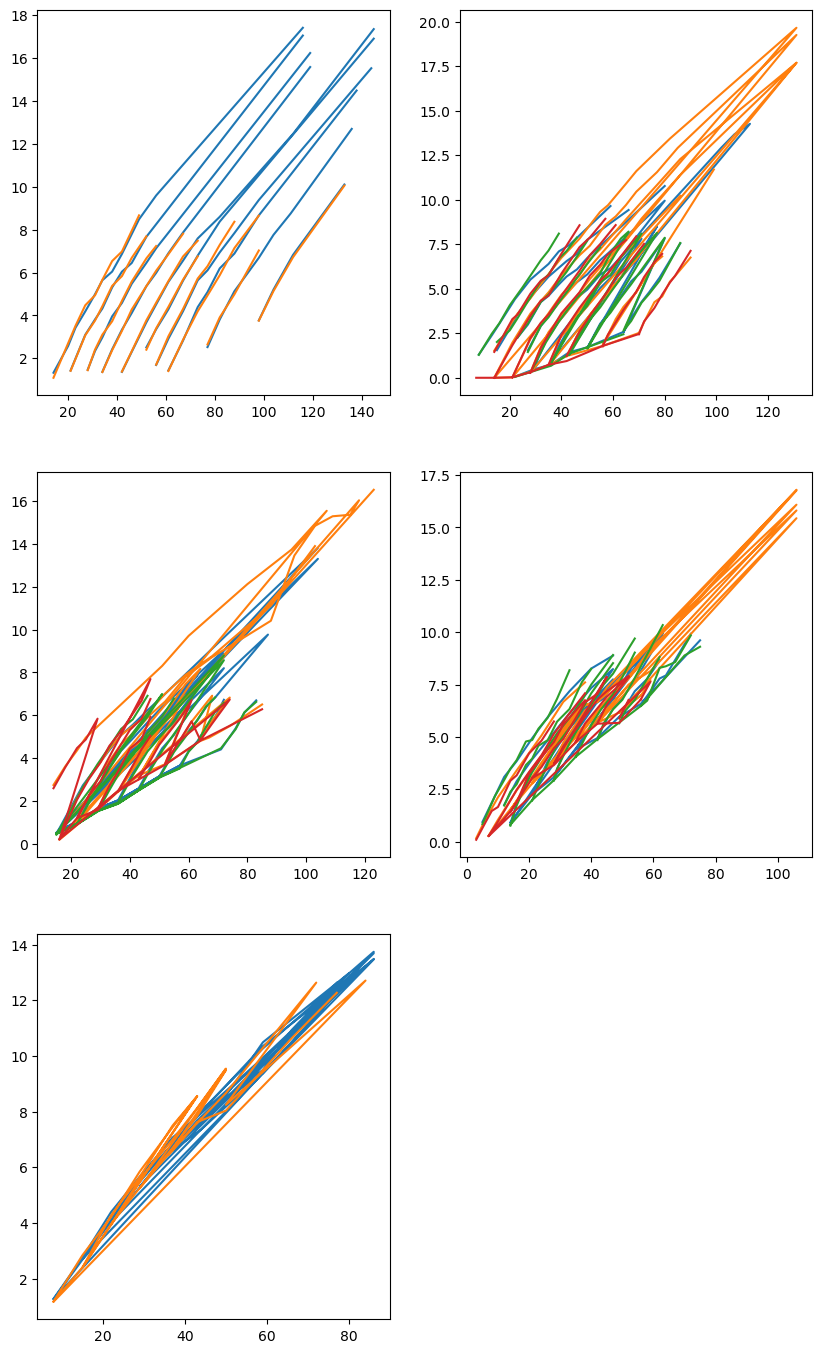

In [10]:
cols = ['r','y']
style = [u'$5$', u'$8$', u'$11$',u'$25$']
Graph = plt.figure(figsize=(10,17))
pos=1
for T in ['1oC','5oC','8oC','11oC','25oC']:
    ax = Graph.add_subplot(3,2,pos)
    for G in ['Winter','Spring']:
        for P in ['0h','8h','16h']:
            try:
                plt.plot(MeansByDate.loc[(G,T,P),'DAS'],
                         MeansByDate.loc[(G,T,P),'Haun'])
            except:
                dummy = 'dumb'
    pos +=1

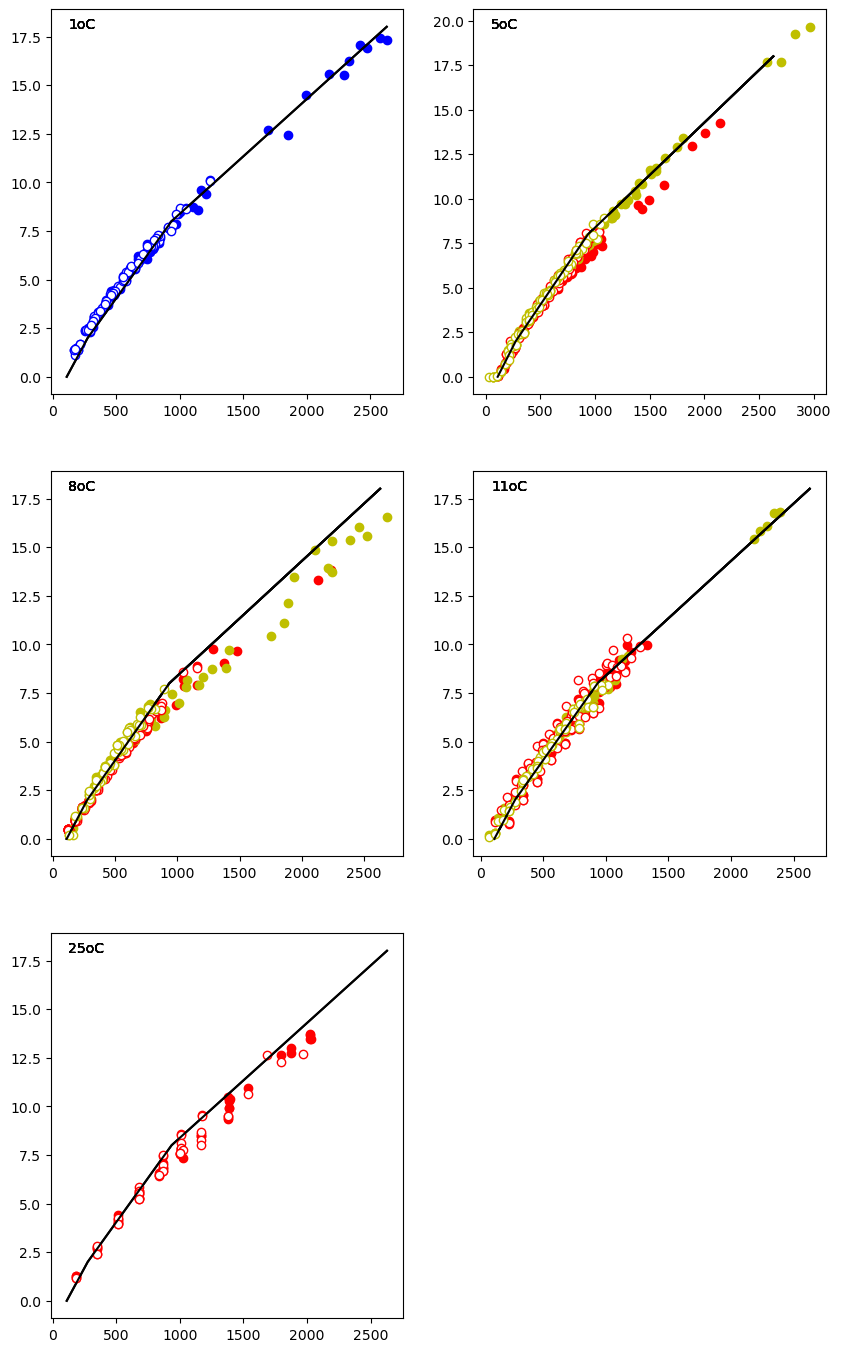

In [11]:
cols = ['b','r','y']
fillcols = ['b','r','y','w','w','w']
style = [u'$5$', u'$8$', u'$11$',u'$25$']
Graph = plt.figure(figsize=(10,17))
pos=1
BP =  110
for T in ['1oC','5oC','8oC','11oC','25oC']:
    ax = Graph.add_subplot(3,2,pos)
    filpos = 0
    for G in ['Winter','Spring']:
        colpos = 0
        for P in ['0h','8h','16h']:
            try:
                plt.plot(MeansByDate.loc[(G,T,P),'ThermalTime'],
                         MeansByDate.loc[(G,T,P),'Haun'],'o',
                        mec=cols[colpos],mfc=fillcols[filpos])
                plt.plot([BP*1,
                          BP*1+BP*0.75*2,
                          BP*1+BP*0.75*2+BP*6,
                          BP*1+BP*0.75*2+BP*6+11*BP*1.4],
                          [0,2,8,18],'-',color='k')
            except:
                dummy = 'dumb'
            colpos +=1
            filpos +=1
            plt.text(0.05,0.95,T,transform=ax.transAxes)
    pos +=1

In [12]:
HaunDF = MeansByDate.reindex(['SimulationName','Date','Haun'],axis=1)
HaunDF.columns = ['SimulationName','Date','Wheat.Structure.HaunStage']
FLNDF = Means.reindex(['SimulationName','Wheat.Phenology.CurrentStageName','FLN'],axis=1)
FLNDF.columns = ['SimulationName','Wheat.Phenology.CurrentStageName','Wheat.Structure.FinalLeafNumber']
FLNDF.sort_index(inplace=True)

In [13]:
TSFIRawData = pd.read_excel('.\\RawData\\BnJCE\\BrookingAndJamiesonRawData.xlsx',sheet_name='TS and FI data')
TSFIRawData.set_index(['Geno','Temp','Pp','DurationWeeks'],inplace=True)
TSFIRawData.sort_index(inplace=True)
#TSFIRawData.loc[:,'SimulationName'] = [MakeSimNameIndexedDF(x) for x in TSFIRawData.index]

In [14]:
TSFIDF = TSFIRawData.reindex(['FLN','EJ_haunStage(fitted)','TS_HaunStage(fitted)'],axis=1)
TSFIDF.columns= ['FLN', 'HSFI', 'HSTS']

In [15]:
FLNDF = pd.concat([FLNDF,TSFIDF],axis=1,sort=True)

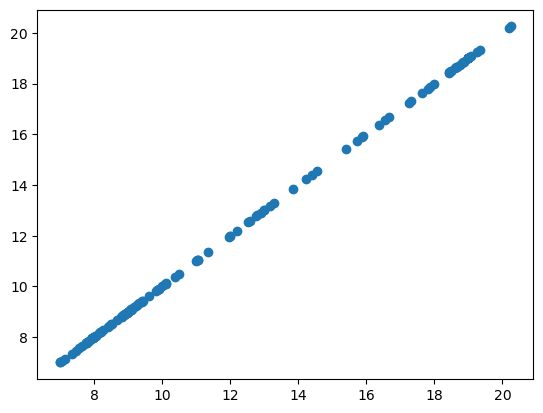

In [16]:
## check FLN from the two sources is the same
plt.plot(FLNDF.loc[:,'FLN'],FLNDF.loc[:,'Wheat.Structure.FinalLeafNumber'],'o')

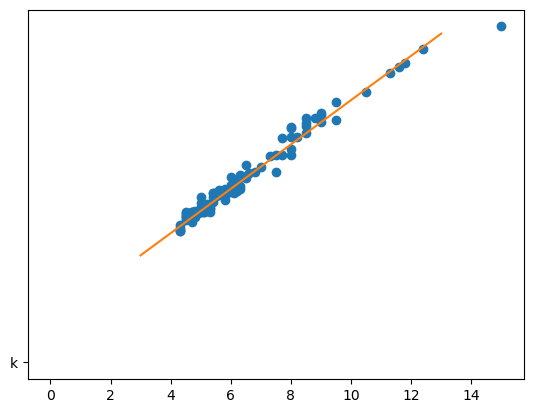

In [17]:
plt.plot(FLNDF.loc[:,'HSTS'],FLNDF.loc[:,'FLN'],'o')
plt.plot([3,13],[5.7,17.5],'-','k')

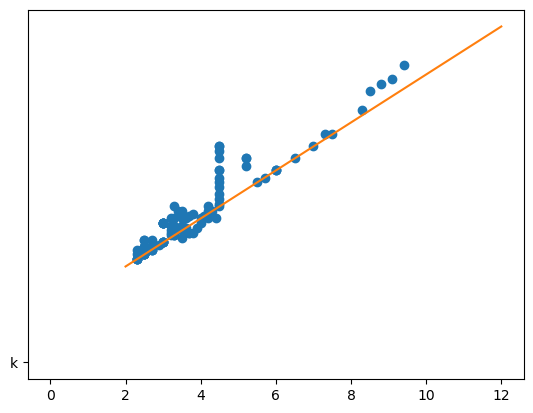

In [18]:
plt.plot(FLNDF.loc[:,'HSFI'],FLNDF.loc[:,'HSTS'],'o')
plt.plot([2,12],[4,14],'-','k')

In [19]:
HaunDF.columns = ['SimulationName', 'Clock.Today', 'Wheat.Structure.HaunStage']#.drop('FLN',axis=1)
FLNDF.drop('FLN',axis=1,inplace=True)

In [20]:
FLNDF.columns = ['SimulationName', 'Wheat.Phenology.CurrentStageName',
       'Wheat.Structure.FinalLeafNumber', 'Wheat.Structure.HaunStageFloralInitiation', 'Wheat.Structure.HaunStageTerminalSpikelet']

In [23]:
Brooking_Jamieson = pd.concat([HaunDF,FLNDF],sort=True)
Brooking_Jamieson.set_index('SimulationName',inplace=True)
Brooking_Jamieson.to_excel('.\ProcessedData\PalmerstonNorthCE_Obs.xlsx',sheet_name='Observed')

In [22]:
Brooking_Jamieson

,Clock.Today,Wheat.Phenology.CurrentStageName,Wheat.Structure.FinalLeafNumber,Wheat.Structure.HaunStage,Wheat.Structure.HaunStageFloralInitiation,Wheat.Structure.HaunStageTerminalSpikelet
SimulationName,,,,,,
PalmerstonNorthCETreat11oC16hCvSpringDurat0,2000-01-04,NaN,NaN,0.093361,NaN,NaN
PalmerstonNorthCETreat11oC16hCvSpringDurat0,2000-01-07,NaN,NaN,0.929666,NaN,NaN
PalmerstonNorthCETreat11oC16hCvSpringDurat0,2000-01-09,NaN,NaN,1.470424,NaN,NaN
PalmerstonNorthCETreat11oC16hCvSpringDurat0,2000-01-11,NaN,NaN,1.659048,NaN,NaN
PalmerstonNorthCETreat11oC16hCvSpringDurat0,2000-01-15,NaN,NaN,2.910399,NaN,NaN
...,...,...,...,...,...,...
PalmerstonNorthCETreat8oC8hCvWinterDurat5,NaN,HarvestRipe,9.066667,NaN,4.2,6.0
PalmerstonNorthCETreat8oC8hCvWinterDurat6,NaN,HarvestRipe,8.947368,NaN,4.0,5.8
PalmerstonNorthCETreat8oC8hCvWinterDurat7,NaN,HarvestRipe,9.400000,NaN,4.2,6.3
